In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
dia = pd.read_csv("diabetes.csv") #reading the file

In [3]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Extracting the target column
y=dia['Outcome']

In [5]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
len(y)

768

In [7]:
X = dia.iloc[:,0:8]

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
#normalize the data
x = (X - np.min(X)) / (np.max(X) - np.min(X)).values

/home/drigger/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/drigger/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [10]:
len(x)

768

In [11]:
#removing the outliers
max_threshold=x.quantile(0.95)
min_threshold=x.quantile(0.05)
x_clean=x[(x>min_threshold) & (x<max_threshold)]

In [12]:
x_clean.fillna(value = x_clean.mean(), inplace = True)

In [13]:
x_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.146689,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.146689,0.396423,0.116567,0.166667
2,0.470588,0.604568,0.524590,0.277241,0.146689,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.191679
4,0.225277,0.688442,0.327869,0.353535,0.198582,0.642325,0.153257,0.200000
...,...,...,...,...,...,...,...,...
763,0.225277,0.507538,0.622951,0.277241,0.212766,0.490313,0.039710,0.191679
764,0.117647,0.613065,0.573770,0.272727,0.146689,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.277241,0.146689,0.448584,0.115713,0.433333


In [14]:
#removing uncorelated columns
x_cle=x_clean.drop(['SkinThickness','Insulin'], axis=1)

In [15]:
x_cle

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.396423,0.116567,0.166667
2,0.470588,0.604568,0.524590,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.418778,0.038002,0.191679
4,0.225277,0.688442,0.327869,0.642325,0.153257,0.200000
...,...,...,...,...,...,...
763,0.225277,0.507538,0.622951,0.490313,0.039710,0.191679
764,0.117647,0.613065,0.573770,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.448584,0.115713,0.433333


In [16]:
#x_glu=x_cle[['Glucose','Outcome']]

<AxesSubplot:>

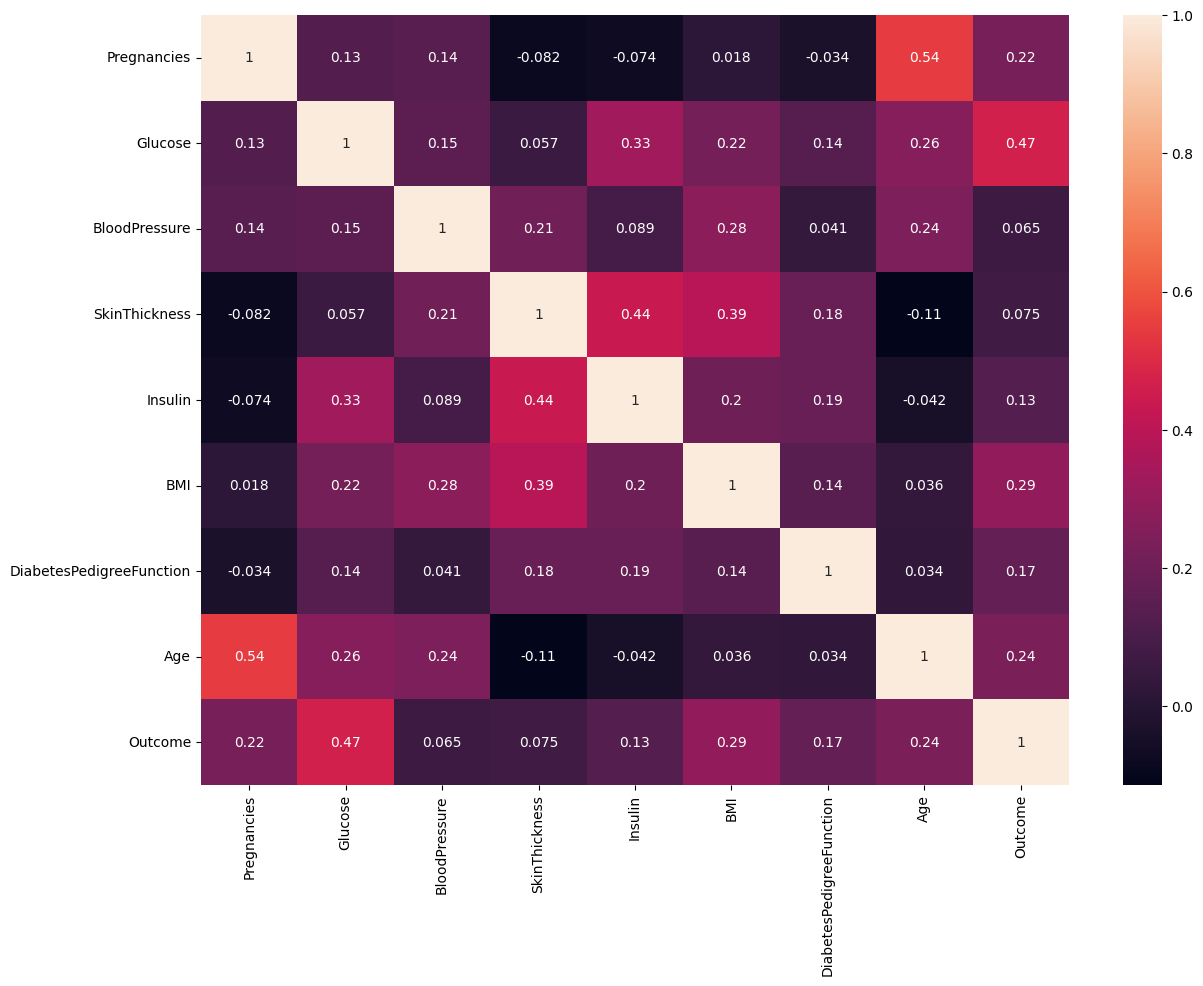

In [17]:
import seaborn as sns
plt.figure(figsize = (14, 10))
corr = dia.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot=True)

# Multivariate Logistic Using Sigmoid function :

In [18]:
x_tr=x_cle.iloc[0:500,:]
x_ts=x_cle.iloc[500:len(x_clean),:]
y_tr=y.iloc[0:500]
y_ts=y.iloc[500:len(y)]
x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

((500, 6), (268, 6), (500,), (268,))

In [19]:
x_tr

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.396423,0.116567,0.166667
2,0.470588,0.604568,0.524590,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.418778,0.038002,0.191679
4,0.225277,0.688442,0.327869,0.642325,0.153257,0.200000
...,...,...,...,...,...,...
495,0.352941,0.834171,0.606557,0.396423,0.096499,0.191679
496,0.294118,0.552764,0.557377,0.387481,0.091375,0.150000
497,0.117647,0.407035,0.590164,0.448584,0.200256,0.066667
498,0.411765,0.604568,0.573770,0.374069,0.036294,0.566667


In [20]:
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

In [21]:
def optimize(x, y,learning_rate,iterations,parameters): 
        size = x.shape[0]
        weight = parameters["weight"] 
        bias = parameters["bias"]
        for i in range(iterations): 
            sigma = sigmoid(np.dot(x, weight) + bias)
            loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
            dW = 1/size * np.dot(x.T, (sigma - y))
            db = 1/size * np.sum(sigma - y)
            weight -= learning_rate * dW
            bias -= learning_rate * db 

        parameters["weight"] = weight
        parameters["bias"] = bias
        return parameters

In [22]:
init_parameters = {} 
init_parameters["weight"] = np.zeros(x_tr.shape[1])
init_parameters["bias"] = 0

In [23]:
def train(x, y, learning_rate,iterations):
    parameters_out = optimize(x, y, learning_rate, iterations ,init_parameters)
    return parameters_out

In [24]:
x_tr.shape, y_tr.shape

((500, 6), (500,))

In [25]:
parameters_out = train(x_tr, y_tr, learning_rate = 0.1, iterations = 1500)

In [26]:
parameters_out

{'weight': array([ 1.01955074,  1.62844142, -0.53182703,  0.31283956,  0.40400839,
         1.24523704]),
 'bias': -1.8975819425719516}

In [27]:
y_tss=y_ts.to_numpy()

In [28]:
y_tss

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0])

In [29]:
# Predict using the trained model
output_values = np.dot(x_ts, parameters_out["weight"]) + parameters_out["bias"]
predictions = np.where(sigmoid(output_values) >= 1/2 ,1,0)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [30]:
#for calculating True Positive, True Negative, False Negative and False Positive
TP=0
FP=0
TN=0
FN=0

In [31]:
for i in range(0,len(predictions)):
    
    if predictions[i]==0 and y_tss[i]==0:
        TN+=1
    elif predictions[i]==0 and y_tss[i]==1:
        FN+=1
    elif predictions[i]==1 and y_tss[i]==1:
        TP+=1
    else:
        FP+=1

In [32]:
pre=float(TP)/float((TP+FP))
pre

0.8461538461538461

In [33]:
TP, TN, FP, FN

(22, 178, 4, 64)

In [34]:
len(predictions)

268

In [35]:
re=TP/(TP+FN)
re

0.2558139534883721

In [36]:
acc=(TP+TN)/(TP+TN+FP+FN)

In [37]:
acc

0.746268656716418

In [38]:
f1=(2*pre*re)/(pre+re)
f1

0.3928571428571428

# Univariate Logistic Using Sigmoid function (Glucose) :

In [39]:
x_cle = x_clean.assign(Outcome=y)
x_glu=x_cle[['Glucose','Outcome']]

In [40]:
y_glusig = x_glu.Outcome

In [41]:
x_glusig = x_glu.iloc[:,:-1]

In [42]:
x_glusig

,Glucose
0,0.743719
1,0.427136
2,0.604568
3,0.447236
4,0.688442
...,...
763,0.507538
764,0.613065
765,0.608040
766,0.633166


In [43]:
x_glutr=x_glusig.iloc[0:500,:]
x_gluts=x_glusig.iloc[500:len(x_glusig),:]

In [44]:
len(x_glutr)

500

In [45]:
y_glusig

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [46]:
y_glutr=y_glusig.iloc[0:500]
y_gluts=y_glusig.iloc[500:len(y)]

In [47]:
x_glutr

,Glucose
0,0.743719
1,0.427136
2,0.604568
3,0.447236
4,0.688442
...,...
495,0.834171
496,0.552764
497,0.407035
498,0.604568


In [48]:
len(x_glutr),len(x_gluts),len(y_glutr),len(y_gluts)

(500, 268, 500, 268)

In [49]:
x_glutr=x_glutr.iloc[:]

In [50]:
x_glutr.shape, x_gluts.shape, y_glutr.shape,y_gluts.shape

((500, 1), (268, 1), (500,), (268,))

In [51]:
x_gluts=x_gluts.iloc[:]

In [52]:
y_glutr=y_glutr.iloc[:]

In [53]:
y_glutr.shape

(500,)

In [54]:
x_glutr.shape

(500, 1)

In [55]:
#y_gluts= y_gluts.iloc[:]

In [56]:
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

In [57]:
def optimize(x, y,learning_rate,iterations,parameters): 
        size = x.shape[0]
        weight = parameters["weight"] 
        bias = parameters["bias"]
        for i in range(iterations): 
            sigma = sigmoid(np.dot(x, weight) + bias)
            loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
            dW = 1/size * np.dot(x.T, (sigma - y))
            db = 1/size * np.sum(sigma - y)
            weight -= learning_rate * dW
            bias -= learning_rate * db 

        parameters["weight"] = weight
        parameters["bias"] = bias
        return parameters

In [58]:
init_parameters = {} 
init_parameters["weight"] = np.zeros(x_glutr.shape[1])
init_parameters["bias"] = 0

In [59]:
def train(x, y, learning_rate,iterations):
    parameters_out = optimize(x, y, learning_rate, iterations ,init_parameters)
    return parameters_out

In [60]:
parameters_out = train(x_glutr, y_glutr, learning_rate = 0.1, iterations = 2500)

In [61]:
parameters_out

{'weight': array([2.85496562]), 'bias': -2.2849233126663773}

In [62]:
y_gluts

500    0
501    0
502    1
503    0
504    0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 268, dtype: int64

In [63]:
# Predict using the trained model
output_values = np.dot(x_gluts, parameters_out["weight"]) + parameters_out["bias"]
predictions = np.where(sigmoid(output_values) >= 1/2 ,1,0)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [64]:
y_gluts=y_gluts.to_numpy()

In [65]:
TP=0
FP=0
TN=0
FN=0

In [66]:
for i in range(0,len(predictions)):
    
    if predictions[i]==0 and y_gluts[i]==0:
        TN+=1
    elif predictions[i]==0 and y_gluts[i]==1:
        FN+=1
    elif predictions[i]==1 and y_gluts[i]==1:
        TP+=1
    else:
        FP+=1

In [67]:
acc=(TP+TN)/(TP+TN+FP+FN)
acc

0.7276119402985075

In [68]:
re=TP/(TP+FN)
pre=TP/(TP+FP)

In [69]:
f1=(2*pre*re)/(pre+re)
f1

0.31775700934579443

# Multivariate Naive Bayes :

<AxesSubplot:>

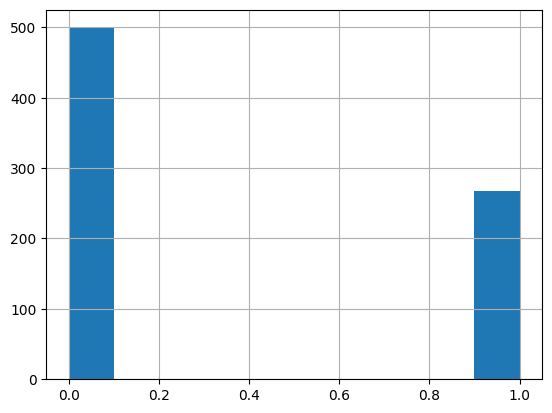

In [70]:
dia['Outcome'].hist()

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

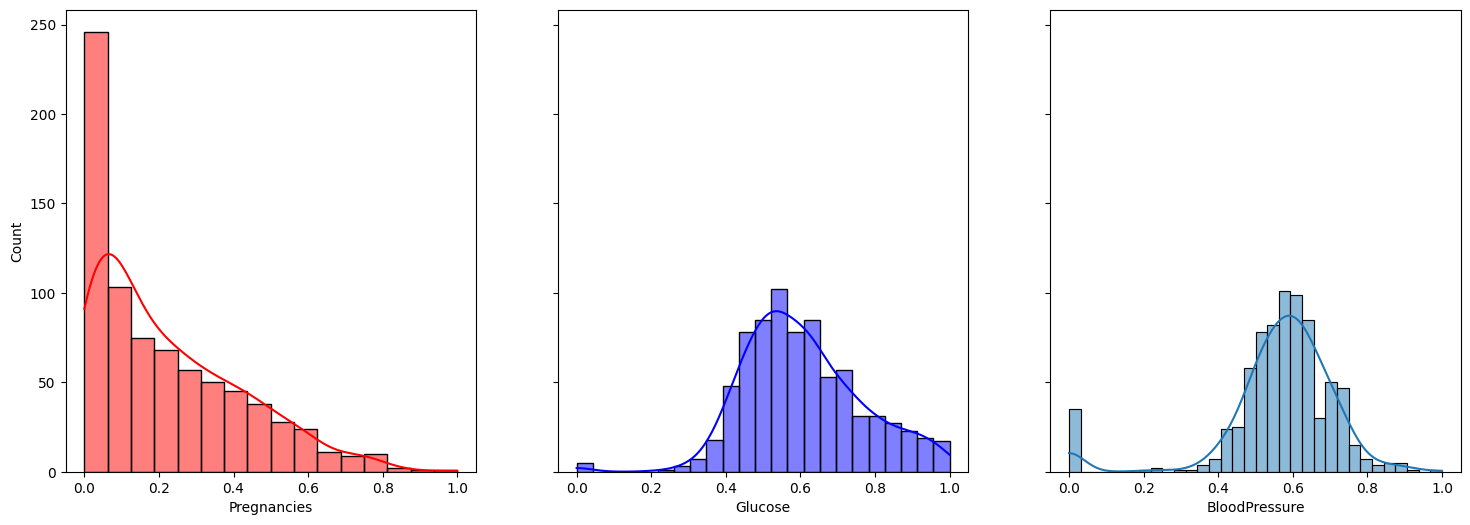

In [71]:
#Checking the distribution of different columns 
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(x, ax=axes[0], x="Pregnancies", kde=True, color='r')
sns.histplot(x, ax=axes[1], x="Glucose", kde=True, color='b')
sns.histplot(x, ax=axes[2], x="BloodPressure", kde=True)

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

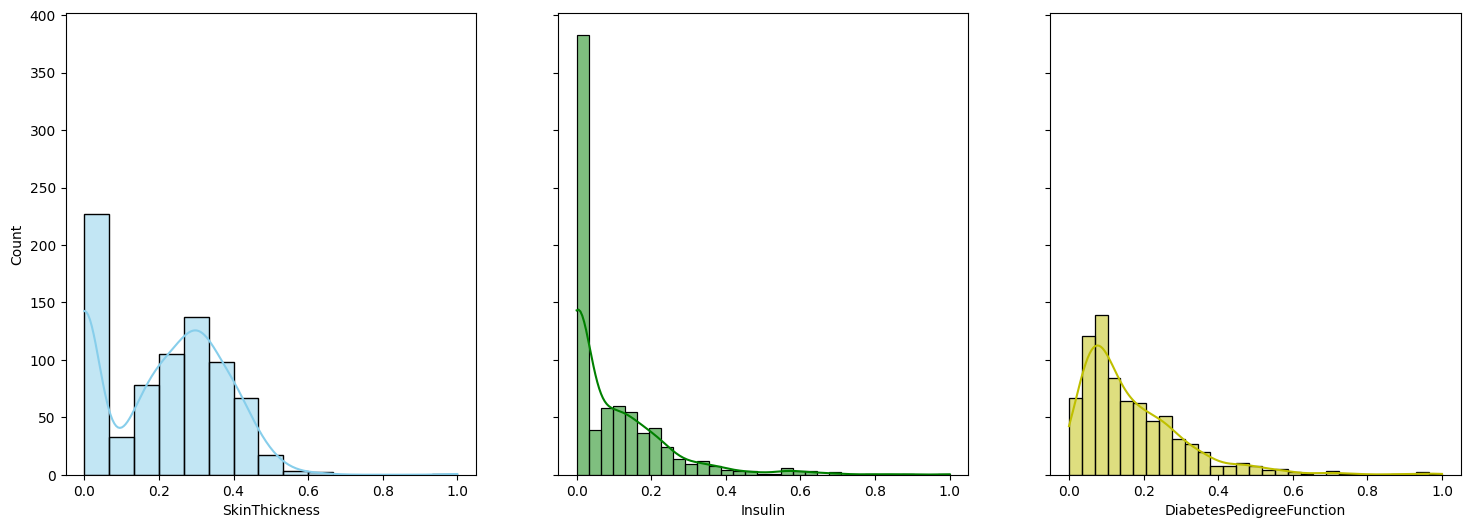

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(x, ax=axes[0], x="SkinThickness", kde=True, color='skyblue')
sns.histplot(x, ax=axes[1], x="Insulin", kde=True, color='g')
sns.histplot(x, ax=axes[2], x="DiabetesPedigreeFunction", kde=True,color='y')

<AxesSubplot:xlabel='Age', ylabel='Count'>

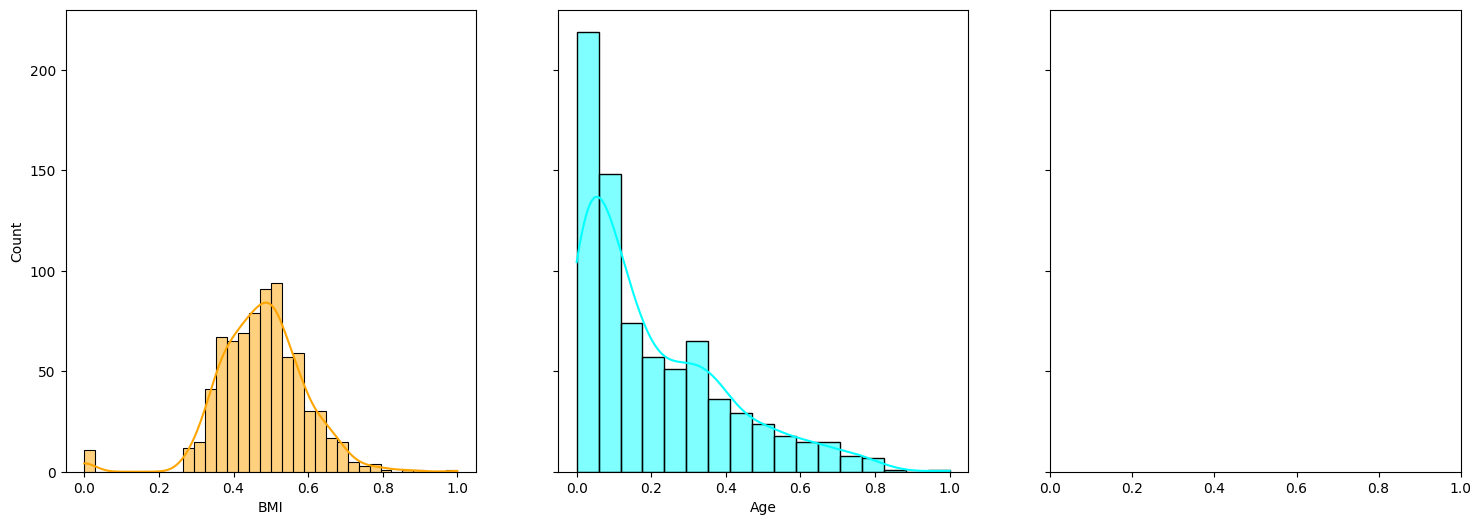

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(x, ax=axes[0], x="BMI", kde=True, color='orange')
sns.histplot(x, ax=axes[1], x="Age", kde=True,color='cyan')

In [74]:
x_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.146689,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.146689,0.396423,0.116567,0.166667
2,0.470588,0.604568,0.524590,0.277241,0.146689,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.191679
4,0.225277,0.688442,0.327869,0.353535,0.198582,0.642325,0.153257,0.200000
...,...,...,...,...,...,...,...,...
763,0.225277,0.507538,0.622951,0.277241,0.212766,0.490313,0.039710,0.191679
764,0.117647,0.613065,0.573770,0.272727,0.146689,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.277241,0.146689,0.448584,0.115713,0.433333


In [75]:
#x_clean.fillna(value = x_clean.mean(), inplace = True)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

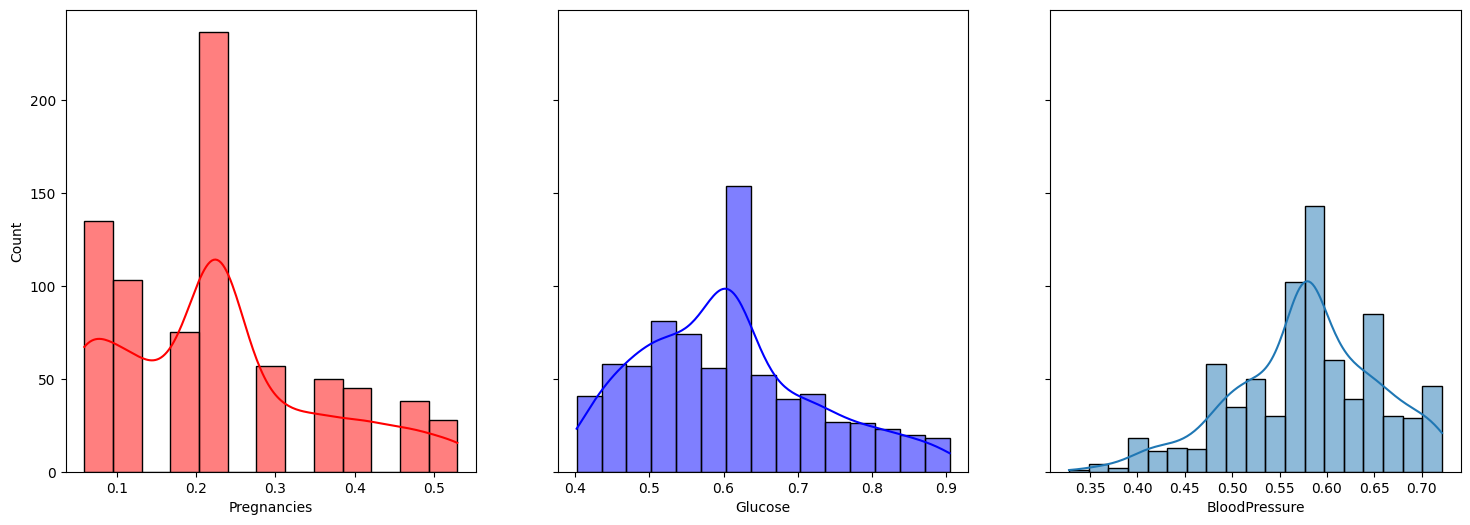

In [76]:
#After cleaning the data again checking the histo
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(x_clean, ax=axes[0], x="Pregnancies", kde=True, color='r')
sns.histplot(x_clean, ax=axes[1], x="Glucose", kde=True, color='b')
sns.histplot(x_clean, ax=axes[2], x="BloodPressure", kde=True)

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

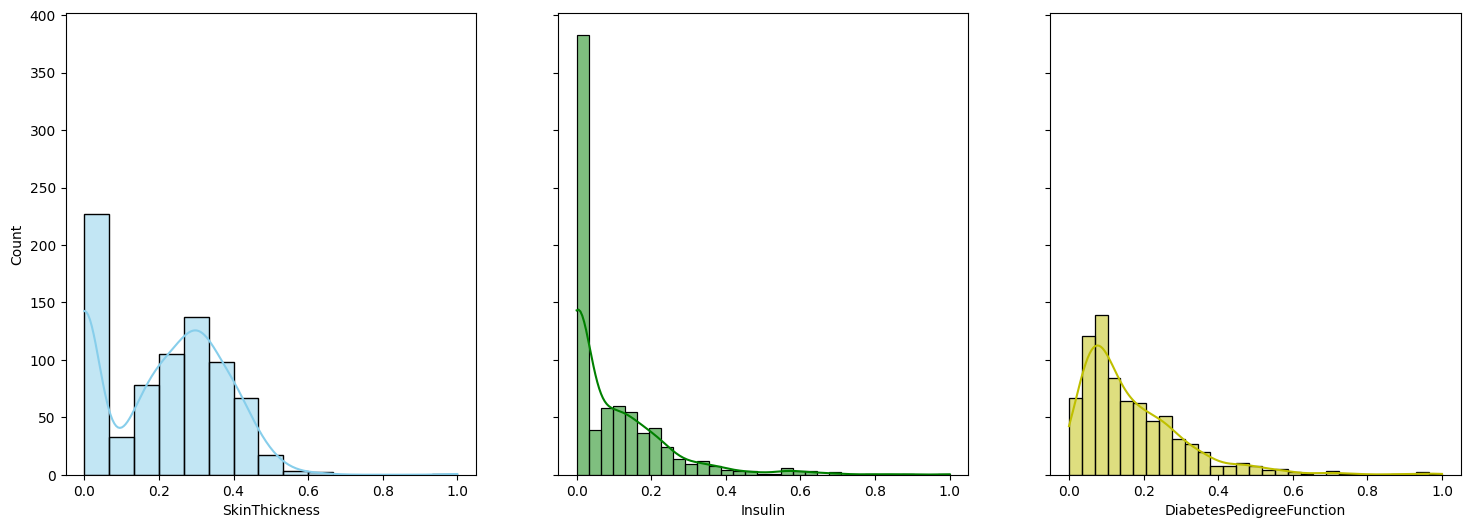

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(x, ax=axes[0], x="SkinThickness", kde=True, color='skyblue')
sns.histplot(x, ax=axes[1], x="Insulin", kde=True, color='g')
sns.histplot(x, ax=axes[2], x="DiabetesPedigreeFunction", kde=True,color='y')

<AxesSubplot:xlabel='Age', ylabel='Count'>

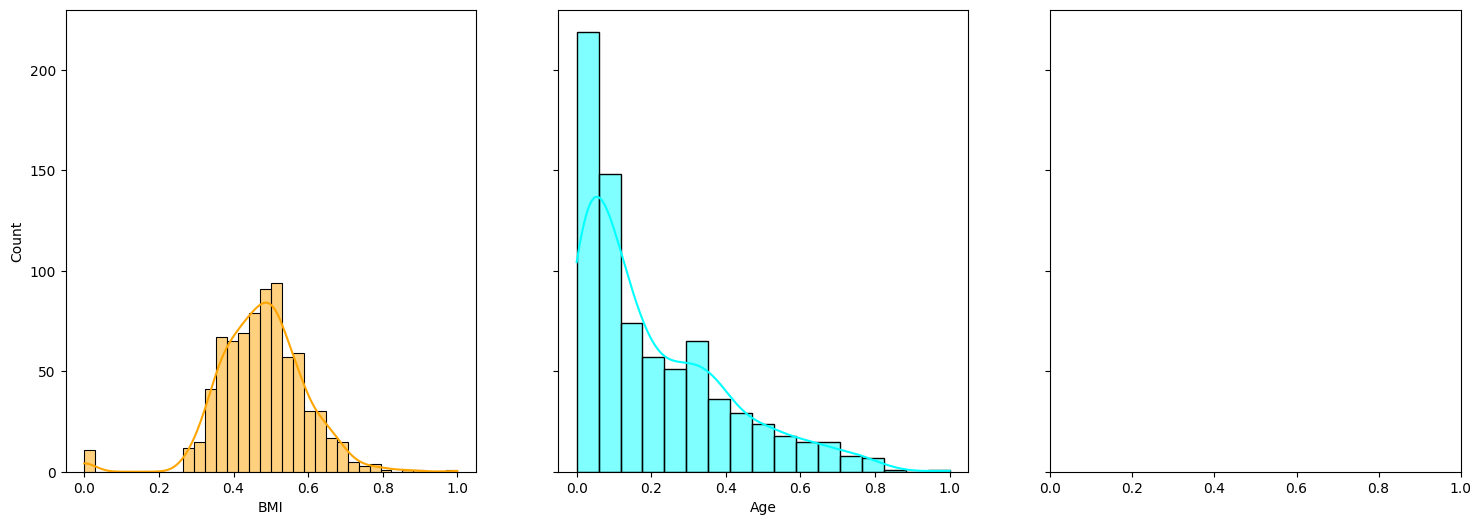

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(x, ax=axes[0], x="BMI", kde=True, color='orange')
sns.histplot(x, ax=axes[1], x="Age", kde=True,color='cyan')

In [79]:
x_clerem=x_clean.drop(['SkinThickness','Insulin'], axis=1)

In [80]:
x_clerem

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.396423,0.116567,0.166667
2,0.470588,0.604568,0.524590,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.418778,0.038002,0.191679
4,0.225277,0.688442,0.327869,0.642325,0.153257,0.200000
...,...,...,...,...,...,...
763,0.225277,0.507538,0.622951,0.490313,0.039710,0.191679
764,0.117647,0.613065,0.573770,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.448584,0.115713,0.433333


In [81]:
x_clr = x_clerem.assign(Outcome=y)

In [82]:
x_clr

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.396423,0.116567,0.166667,0
2,0.470588,0.604568,0.524590,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.418778,0.038002,0.191679,0
4,0.225277,0.688442,0.327869,0.642325,0.153257,0.200000,1
...,...,...,...,...,...,...,...
763,0.225277,0.507538,0.622951,0.490313,0.039710,0.191679,0
764,0.117647,0.613065,0.573770,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.448584,0.115713,0.433333,1


In [83]:
#Setting upi test and train
train=x_clr.iloc[:614,:]
test=x_clr.iloc[614:len(x_glu),:]
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

In [84]:
def calculatePrior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [85]:
def calculateLikelihoodGaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [86]:
def naiveBayesGaussian(df, X, Y):
    features = list(df.columns)[:-1]
    prior = calculatePrior(df, Y)
    Y_pred = []
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculateLikelihoodGaussian(df, features[i], x[i], Y, labels[j])
        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [87]:
Y_pred = naiveBayesGaussian(train, X_test, Y="Outcome")

In [88]:
Y_pred = naiveBayesGaussian(train, X_test, Y="Outcome")

In [89]:
Y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [90]:
TP=0
FP=0
TN=0
FN=0

In [91]:
for i in range(0,len(Y_pred)):
    
    if Y_pred[i]==0 and Y_test[i]==0:
        TN+=1
    elif Y_pred[i]==0 and Y_test[i]==1:
        FN+=1
    elif Y_pred[i]==1 and Y_test[i]==1:
        TP+=1
    else:
        FP+=1

In [92]:
TP, TN, FP, FN

(29, 84, 15, 26)

In [93]:
acc=(TP+TN)/(TP+TN+FP+FN)

In [94]:
acc

0.7337662337662337

In [95]:
pre=float(TP)/float((TP+FP))
re=TP/(TP+FN)
f1=(2*pre*re)/(pre+re)
f1

0.5858585858585857

# Univariate Naive Bayes(Glucose) :

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

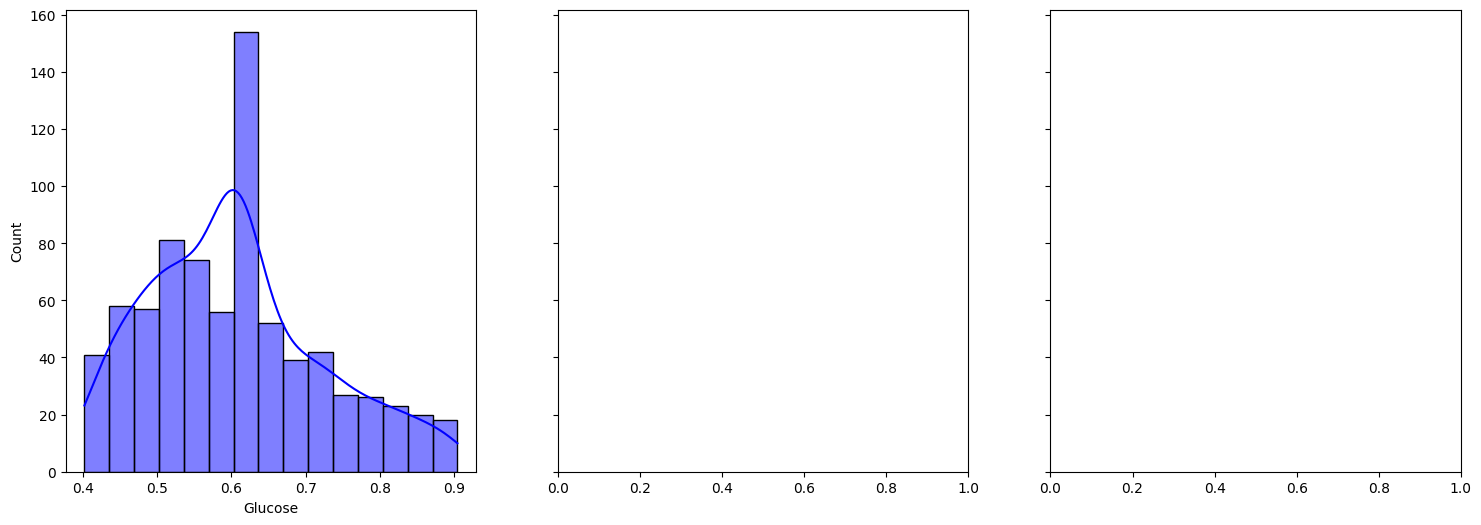

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(x_clean, ax=axes[0], x="Glucose", kde=True, color='b')

In [97]:
x_glu

,Glucose,Outcome
0,0.743719,1
1,0.427136,0
2,0.604568,1
3,0.447236,0
4,0.688442,1
...,...,...
763,0.507538,0
764,0.613065,0
765,0.608040,0
766,0.633166,1


In [98]:
#setting up test and train
X_glutrain=x_glu.iloc[:614,:]
glutest=x_glu.iloc[614:len(x_glu),:]

X_glutest = glutest.iloc[:,:-1].values
Y_glutest = glutest.iloc[:,-1].values

In [99]:
Y_pred = naiveBayesGaussian(X_glutrain, X_glutest, Y="Outcome")

In [100]:
TP=0
FP=0
TN=0
FN=0

In [101]:
for i in range(0,len(Y_pred)):
    
    if Y_pred[i]==0 and Y_test[i]==0:
        TN+=1
    elif Y_pred[i]==0 and Y_test[i]==1:
        FN+=1
    elif Y_pred[i]==1 and Y_test[i]==1:
        TP+=1
    else:
        FP+=1

In [102]:
TP,FP,TN,FN

(23, 9, 90, 32)

In [103]:
acc=(TP+TN)/(TP+TN+FP+FN)

In [104]:
acc

0.7337662337662337

In [105]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [106]:
pre=float(TP)/float((TP+FP))
re=TP/(TP+FN)
f1=(2*pre*re)/(pre+re)
f1

0.528735632183908